# Linear Regression 

The foundations of regression were laid by Sir Francis Galton in the 19th century. Galton studied how physical characteristics are passed down from one generation to the next. Among his best known work is the prediction of the heights of adults based on the heights of their parents. We have studied the dataset that Galton collected for this. The table heights contains his data on the midparent height and child’s height (all in inches) for a population of 934 adult “children”.

In [ ]:
#Import Packages 
import numpy as np
import pandas as pd

# These lines set up graphing capabilities.
import matplotlib.pyplot as plt

In [ ]:
#Import Data 
heights = pd.read_csv('https://raw.githubusercontent.com/LGKerby/Python/master/galton.csv')
heights.head(10)

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5
5,2,75.5,66.5,73.66,4,2,male,72.5
6,2,75.5,66.5,73.66,4,3,female,65.5
7,2,75.5,66.5,73.66,4,4,female,65.5
8,3,75.0,64.0,72.06,2,1,male,71.0
9,3,75.0,64.0,72.06,2,2,female,68.0


Our goal is to create a linear regression model that predicts a child's height based average parents height. Let's visualize the child height and see how it behaves. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc177393790>]],
      dtype=object)

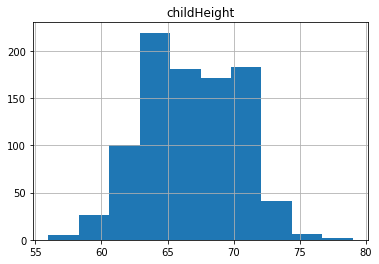

In [ ]:
heights.hist('childHeight')

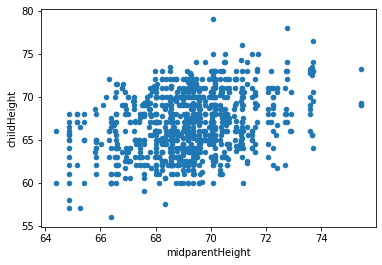

In [ ]:
#Create a scatter plot of the childHeight vs the midParentHeight 
heights.plot.scatter('midparentHeight', 'childHeight')

In [ ]:
#Average 
child_mean = heights['childHeight'].mean()
child_mean

66.74593147751605

In [ ]:
#Standard Deviation 
child_std = heights['childHeight'].std()
child_std

3.5792512015188347

In [ ]:
#Find the correlation coefficent between our two variables 
from scipy.stats import pearsonr
pearsonr(heights['midparentHeight'], heights['childHeight'])

(0.3209498960639593, 8.053864992484446e-24)

In [ ]:
#Correlation matrix 
np.corrcoef(heights['midparentHeight'], heights['childHeight'])

array([[1.       , 0.3209499],
       [0.3209499, 1.       ]])

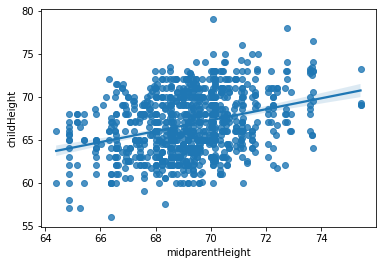

In [ ]:
#We can use Seaborn to calculate and plot a trend lind using regplot
import seaborn as sns 
sns.regplot(x='midparentHeight', y='childHeight', data=heights)

In [ ]:
from scipy import stats 
(slope, intercept, r_value, p_value, std_err)= stats.linregress(heights['midparentHeight'], heights['childHeight'])
print(f'y={slope:.2f}x+{intercept:.2f}')
r_value

y=0.64x+22.64


0.3209498960639595

In [ ]:
#Evaluate our Model 
heights['Predicted']= slope*heights['midparentHeight']+ intercept
heights 

,family,father,mother,midparentHeight,children,childNum,gender,childHeight,Predicted,Residuals
0,1,78.5,67.0,75.43,4,1,male,73.2,70.712373,-75.687627
1,1,78.5,67.0,75.43,4,2,female,69.2,70.712373,-67.687627
2,1,78.5,67.0,75.43,4,3,female,69.0,70.712373,-67.287627
3,1,78.5,67.0,75.43,4,4,female,69.0,70.712373,-67.287627
4,2,75.5,66.5,73.66,4,1,male,73.5,69.584244,-77.415756
...,...,...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0,65.109971,-62.890029
930,203,62.0,66.0,66.64,3,2,female,62.0,65.109971,-58.890029
931,203,62.0,66.0,66.64,3,3,female,61.0,65.109971,-56.890029
932,204,62.5,63.0,65.27,2,1,male,66.5,64.236786,-68.763214


In [ ]:
heights['Residuals']= heights['Predicted']-heights['childHeight']
heights 

,family,father,mother,midparentHeight,children,childNum,gender,childHeight,Predicted,Residuals
0,1,78.5,67.0,75.43,4,1,male,73.2,70.712373,-2.487627
1,1,78.5,67.0,75.43,4,2,female,69.2,70.712373,1.512373
2,1,78.5,67.0,75.43,4,3,female,69.0,70.712373,1.712373
3,1,78.5,67.0,75.43,4,4,female,69.0,70.712373,1.712373
4,2,75.5,66.5,73.66,4,1,male,73.5,69.584244,-3.915756
...,...,...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0,65.109971,1.109971
930,203,62.0,66.0,66.64,3,2,female,62.0,65.109971,3.109971
931,203,62.0,66.0,66.64,3,3,female,61.0,65.109971,4.109971
932,204,62.5,63.0,65.27,2,1,male,66.5,64.236786,-2.263214


In [ ]:
#Let's add up all the residuals 
heights['Residuals'].sum()

-1.0388134796812665e-11

In [ ]:
heights['Residuals'].mean()

-1.1122199996587436e-14

In [ ]:
import math 
#Calculate 
SSE = sum((heights['Residuals'])**2)
SSE

10721.465875569307

In [ ]:
#RSE 
RSE= SSE/len(heights)
RSE

11.479085519881485

In [ ]:
#RMSE 
RMSE = math.sqrt(RSE)
RMSE

3.3880799163953443

In [ ]:
#Scikit-learn has a function that can calculate both RSE and RSME 
from sklearn.metrics import mean_squared_error
mean_squared_error(heights['childHeight'], heights['Predicted'], squared=False)


3.3880799163953426